In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Consider aesthetics
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.axisbelow'] = True
plt.rcParams.update({'font.size': 13})

In [352]:
df = pd.read_csv("Hepatitis_C.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     204 non-null    int64  
 1   Sex     204 non-null    int64  
 2   ALB     204 non-null    float64
 3   ALP     204 non-null    float64
 4   ALT     204 non-null    float64
 5   AST     204 non-null    float64
 6   BIL     204 non-null    float64
 7   CHE     204 non-null    float64
 8   CHOL    204 non-null    float64
 9   CREA    204 non-null    float64
 10  GGT     204 non-null    float64
 11  PROT    204 non-null    float64
 12  label   204 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 20.8 KB


In [353]:
df_features = df.iloc[:,0:-1]
df_targets = df.iloc[:,-1]

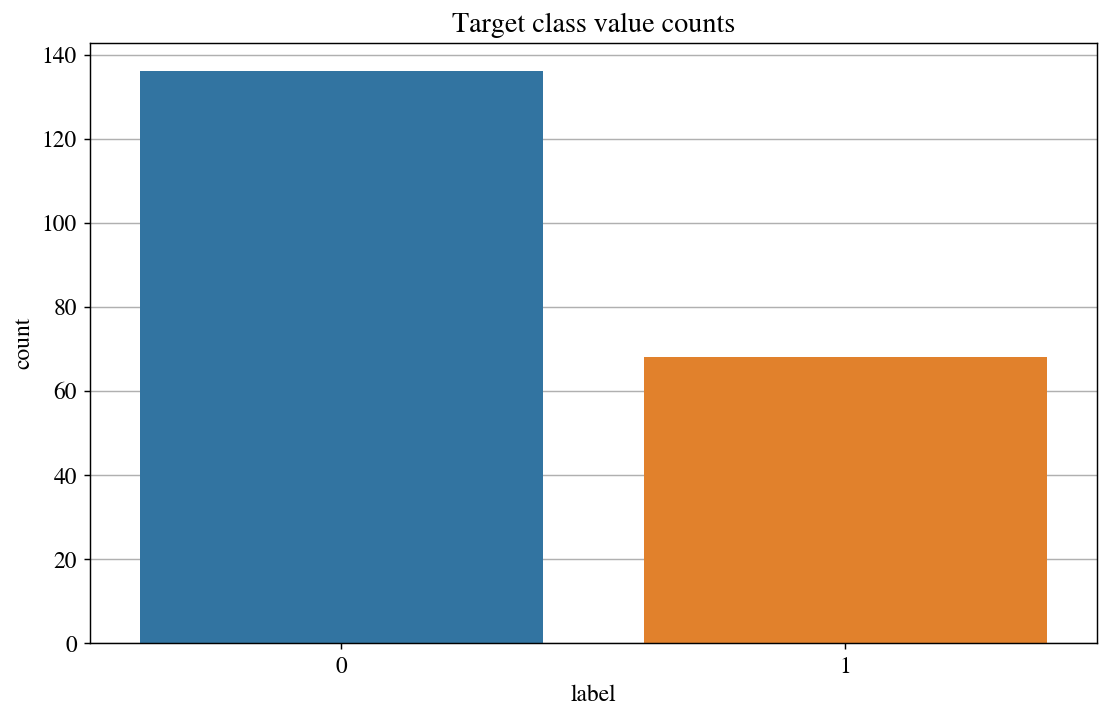

In [354]:
plt.figure(figsize = (10,6), dpi= 130)
plt.grid()
sns.countplot(x = df_targets)
plt.title("Target class value counts")
plt.show()

In [355]:
df_disc_cont = df_features.drop(columns = ['Sex','Age'])
df_disc_cont_header = df_disc_cont.columns
df_disc_cont.describe()

,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,41.200490,66.647549,29.841618,48.688725,16.460294,7.934951,5.212157,86.037255,55.117157,72.811765
std,5.656545,33.630161,30.205844,50.826309,29.763884,2.569216,1.128499,83.340139,78.465442,5.581961
min,20.000000,11.300000,0.900000,12.200000,1.800000,1.420000,1.430000,8.000000,7.000000,51.000000
25%,38.950000,52.000000,14.900000,22.425000,5.800000,6.637500,4.445000,66.625000,18.600000,70.000000
50%,41.900000,62.700000,21.500000,29.800000,8.800000,7.970000,5.220000,75.600000,28.700000,72.750000
75%,45.000000,76.250000,35.025000,47.500000,14.025000,9.652500,5.957500,86.250000,64.200000,76.100000
max,62.900000,416.600000,258.000000,324.000000,254.000000,16.410000,8.280000,1079.100000,650.900000,90.000000


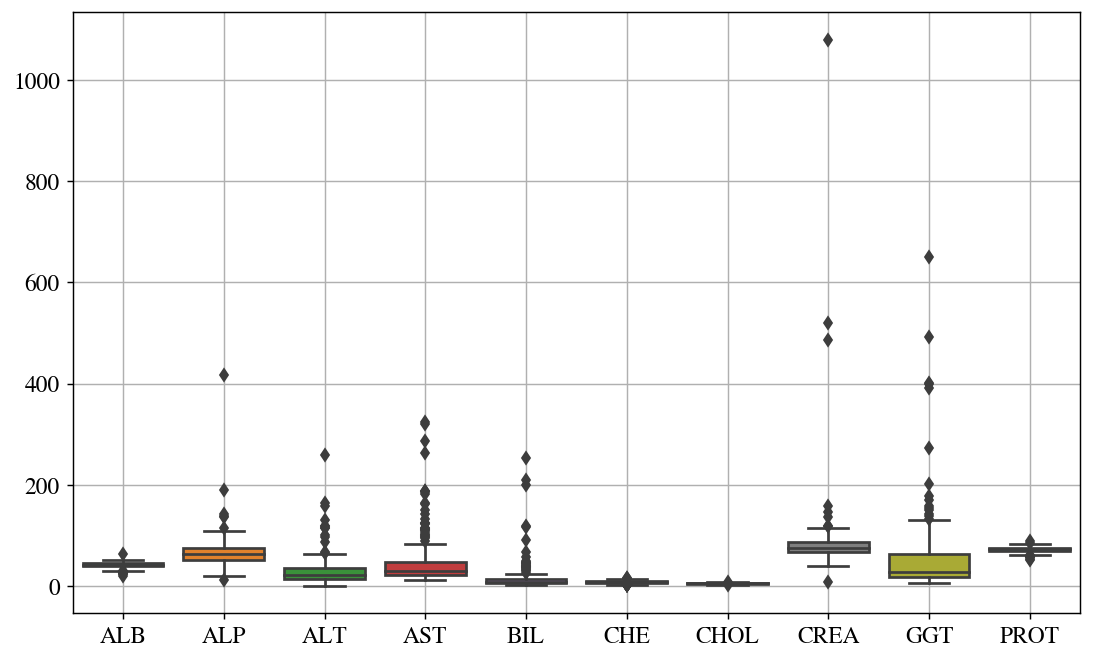

In [356]:
plt.figure(figsize=(10,6),dpi=130)
sns.boxplot(df_disc_cont)
plt.grid()
plt.show()

In [357]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_disc_cont = scaler.fit_transform(df_disc_cont.values)
df_disc_cont = pd.DataFrame(df_disc_cont, columns = df_disc_cont_header)


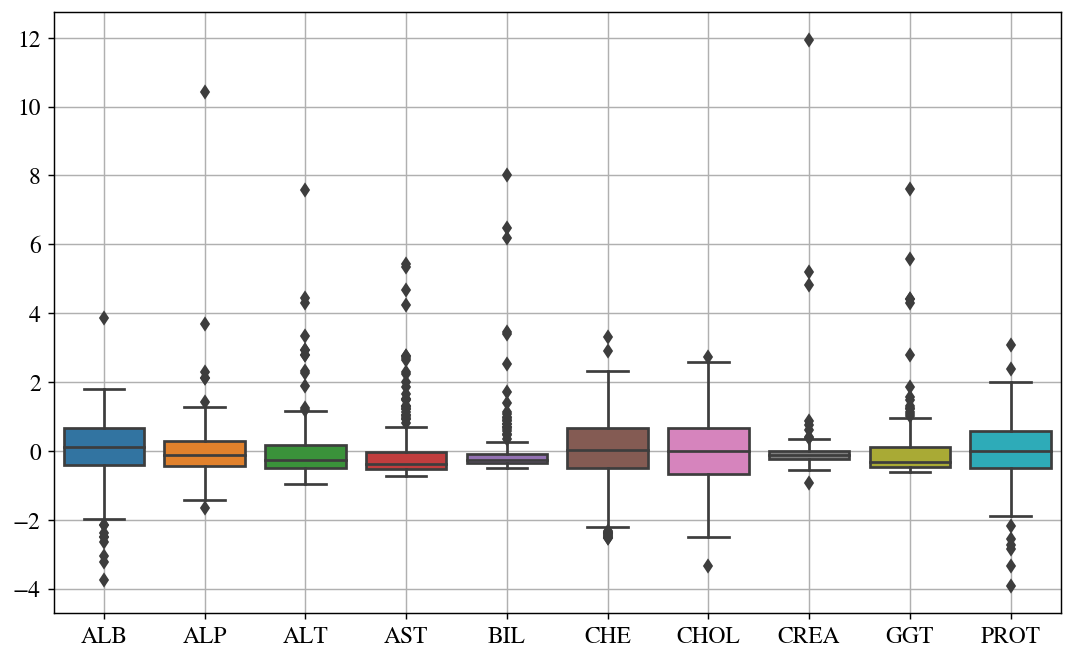

In [358]:
plt.figure(figsize=(10,6),dpi=130)
sns.boxplot(df_disc_cont)
plt.grid()
plt.show()

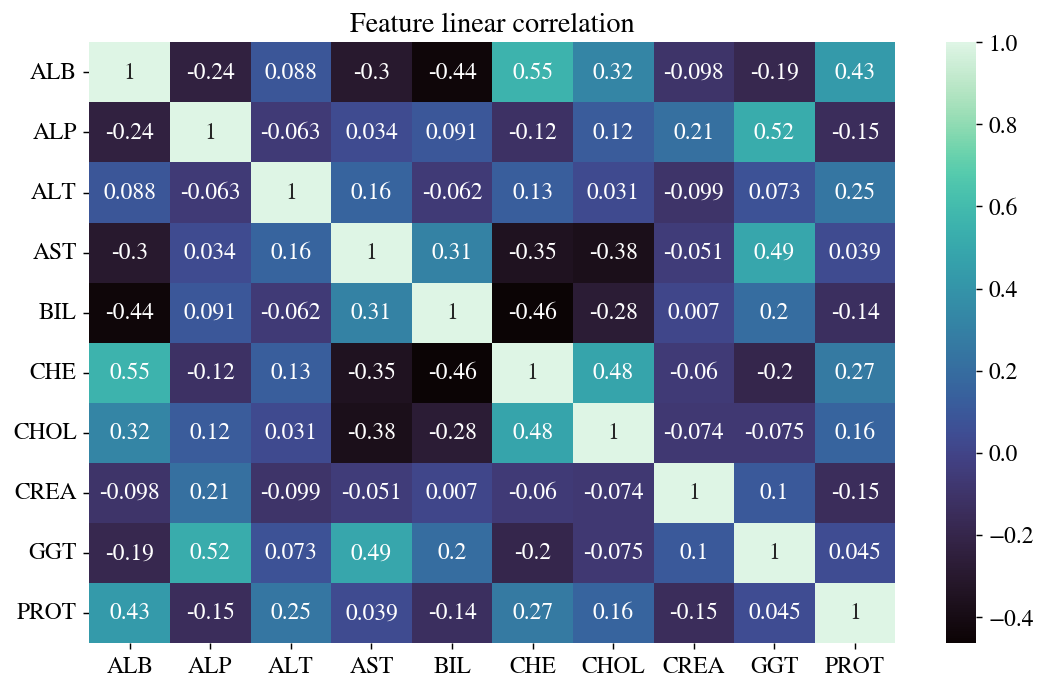

In [359]:
plt.figure(figsize=(10,6),dpi=130)
sns.heatmap(df_disc_cont.corr(), annot= True, cmap="mako")
plt.title("Feature linear correlation")
plt.show()

In [360]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
X_pca = pca.fit_transform(df_disc_cont.values)
variance_explained = pca.explained_variance_ratio_
print(np.sum(variance_explained))

0.9729913699163839


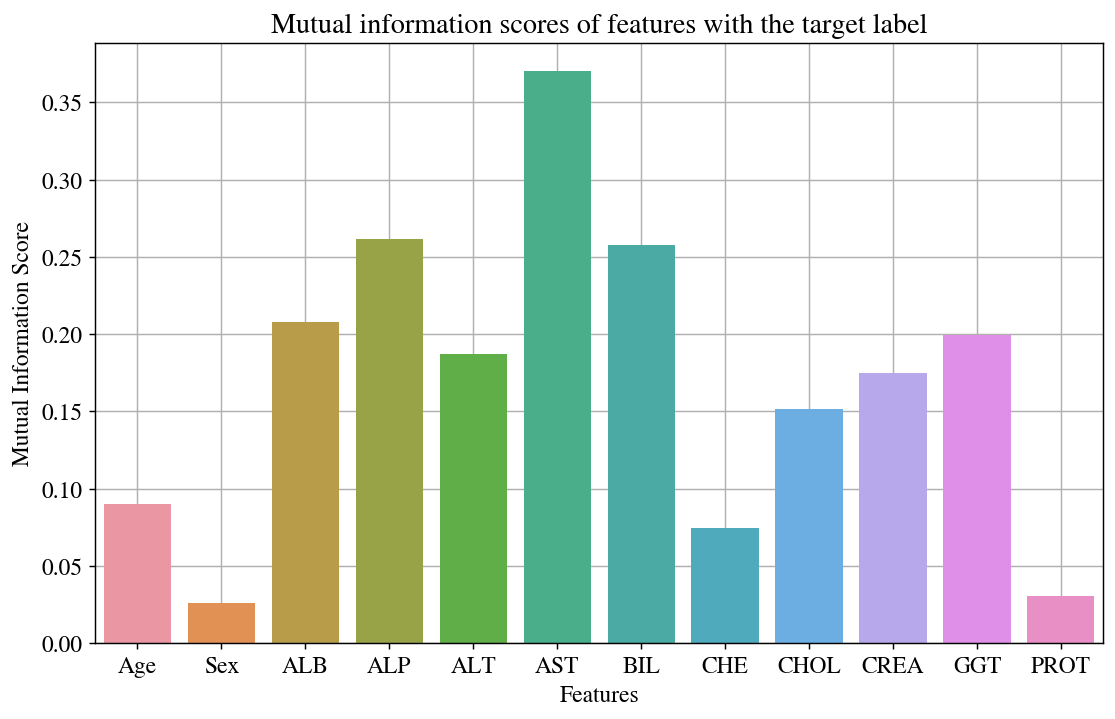

In [366]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(df_features,df['label'])
plt.figure(figsize=(10, 6), dpi=130)
sns.barplot(x=df_features.columns, y= mi_scores)
plt.title("Mutual information scores of features with the target label")
plt.ylabel("Mutual Information Score")
plt.xlabel("Features")
plt.grid()
plt.show()